In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import ast

# Load the data
data = pd.read_csv('../data/freekick_pass_shot.csv')

data = data[data['type'] == 'Shot'] # Assuming 'type' is the column indicating the event type

# Parse freeze frame data and extract features
def parse_freeze_frame(freeze_frame):
    players = ast.literal_eval(freeze_frame)
    x_positions = [player['location'][0] for player in players]
    y_positions = [player['location'][1] for player in players]
    return x_positions, y_positions

data['x_positions'], data['y_positions'] = zip(*data['shot_freeze_frame'].map(parse_freeze_frame))

# Calculate additional features such as mean and variance of positions
data['x_mean'] = data['x_positions'].apply(np.mean)
data['y_mean'] = data['y_positions'].apply(np.mean)
data['x_var'] = data['x_positions'].apply(np.var)
data['y_var'] = data['y_positions'].apply(np.var)

# Select features and target variable
features = ['x_mean', 'y_mean', 'x_var', 'y_var']
X = data[features]
y = data['shot_statsbomb_xg']  # assuming 'expected_goal' is the column name for xG



ImportError: cannot import name 'PowerTransformer' from 'sklearn.model_selection' (c:\Users\Thomas\.conda\envs\projet\lib\site-packages\sklearn\model_selection\__init__.py)

Mean Absolute Percentage Error: 0.9067909778066243
R^2 Score: 0.040257553143792535


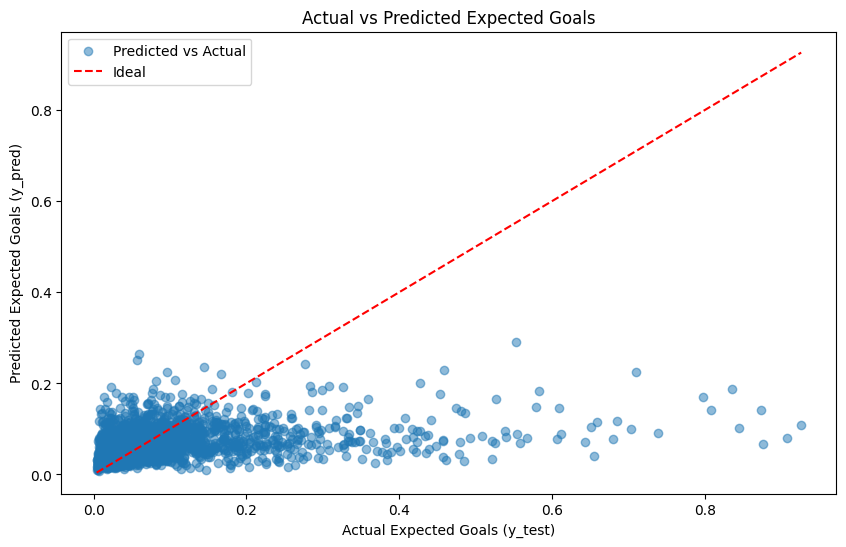

In [43]:
# Split the data into training and testing sets
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
import matplotlib.pyplot as plt


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)

boxcox_transformer = PowerTransformer(method='box-cox')
y_transformed = boxcox_transformer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_transformed = model.predict(X_test)

# Inverse transform the predictions to original scale
y_pred = boxcox_transformer.inverse_transform(y_pred_transformed.reshape(-1, 1)).ravel()
y_test_orig = boxcox_transformer.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Evaluate the model
mse = mean_absolute_percentage_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f'Mean Absolute Percentage Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot y_test_orig vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test_orig), max(y_test_orig)], [min(y_test_orig), max(y_test_orig)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Expected Goals (y_test)')
plt.ylabel('Predicted Expected Goals (y_pred)')
plt.title('Actual vs Predicted Expected Goals')
plt.legend()
plt.show()

In [45]:
y_pred.max()

0.291491202123408

In [38]:
boxcox_transformer = PowerTransformer(method='box-cox')
y_transformed = boxcox_transformer.fit_transform(y.values.reshape(-1, 1)).ravel()

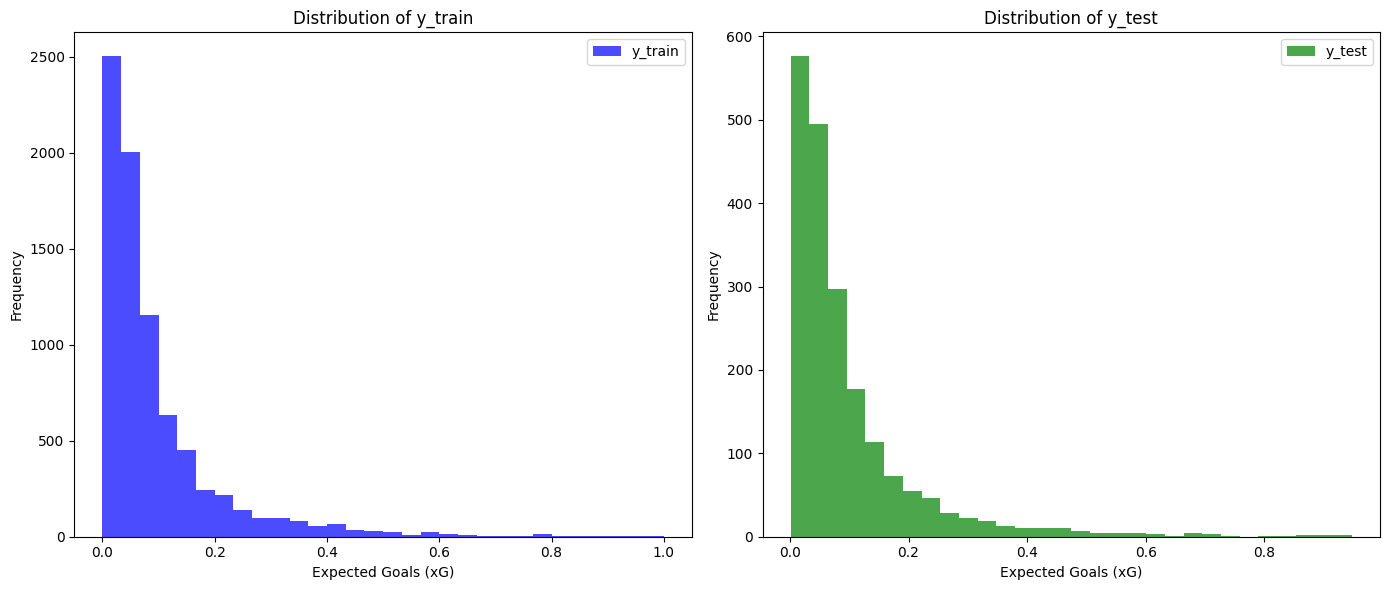

In [40]:
import matplotlib.pyplot as plt

# Plot the distribution of y_train and y_test
plt.figure(figsize=(14, 6))

# Plot y_train distribution
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, color='blue', label='y_train')
plt.title('Distribution of y_train')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Frequency')
plt.legend()

# Plot y_test distribution
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, color='green', label='y_test')
plt.title('Distribution of y_test')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
